<a href="https://colab.research.google.com/github/mehdiguel/ML_Projects/blob/main/Decompose_a_Time_Serie_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Série temporelle

Dans ce tutoriel, nous verrons comment décomposer une série temporelle en 4 élements que sont la composante cyclique $C_t$, la **tendance** $T_t$ (Trend), la **saisonalité** (seasonality) $S_t$ et le **bruit** (Noise component) $I_t$ en python.

#### Rappel sur les séries temporelles

Une serie temporelle est une série de points listée dans un ordre temporel. L'interval de collecte de ces points est le même entre chaque point.
Les valeurs actions sont un exemple de serie temporelle. La température sur une zone géographique donnée est également un exeple de serie temporelle.

Une série temporelle peut être décomposer en 4 composantes.

Ces composantes correspondent à:

* Composante cyclique à l'intant $t$ $C_t$: Les fluctuations répétées et non périodique. (Autrement appelée  **Level** qui correspond à une moyenne de la série temporelle).
* Trend $T_t$: La valeur de la croissance/décroissance de la série
* Seasonality $S_t$: Le cycle qui se répetent dans le serie
* Noise $I_t$: Le bruit qui se répete 

Une série peut être vue comme une combinaison où aggregation de ces quatres composantes. Toutes les séries ont une composante cyclique non périodique et un bruit.
Ce qui n'est pas la cas du Trend et de la seasonalité. Une serie temporelle peut être modéliser à l'aide d'un modèle **additif** et d'un modèle **multiplicatif**.

#### Modèle Additif

Un modèle additif est un modèle où les composantes sont additionnnés entre elles.

$$y_t = T_t + C_t + S_t + I_t,$$

De la même manière, il est également possible de décomposer une série temporelle en ces 4 composantes en supposant que le modèle est additif. La somme des composantes crées permettras de retrouver la série initiale. La librairie **statmodels** permet de faire ce travail. Elle affiche la tendance $T_t$, la saisonalité $S_t$ et le bruit $I_t$.

In [ ]:
len(series)

449

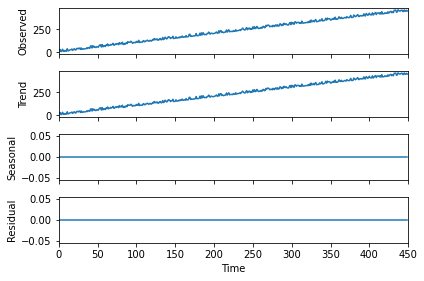

In [ ]:
# Décomposition suivant le modèle additif à l'aide de la librairie statsmodels

#### Importation des librairies
from random import randrange
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

#### Création d'une série de 450 éléments 
series = [i + randrange(6)**2 for i in range(1,451)]

#### Décomposition de la série
result = seasonal_decompose(series, model='additive', freq=1)

#### Affichage des résultats
result.plot()
pyplot.show()

La série est bien décomposé suivant ces trois composantes.

#### Modèle Multiplicatif

 $$ y_t = T_t \times C_t \times S_t \times I_t. \, $$

Un modèle additif est un modèle où les composantes sont multiplier entre elles en supposant que le modèle est **multiplicatif**. Le produit des composantes crées permettras de retrouver la série initiale.

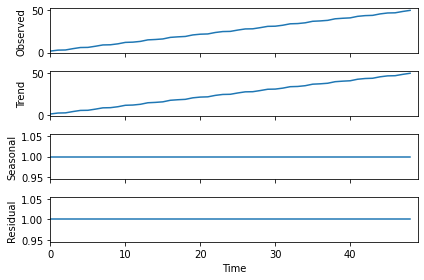

In [ ]:
#### Chargement des librairies

from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

#### On crée une série d'entier de 1 à 50
series = [i + np.sin(i)**2 for i in range(1,50)]

#### On décompose celle-ci
result = seasonal_decompose(series, model='multiplicative', freq=1)

#### Affichage
result.plot()
pyplot.show()

#### Application à un exemple réel (Air passenger data set)

Le jeu de donnée utilisé correspond au nombre de passagé d'une compagnie aérienne par mois entre 1949 et 1956. Il est téléchargeable à l'adresse suivante:
https://www.kaggle.com/rakannimer/air-passengers

On commencera par charger le fichier à l'aide de la fonction **read_csv**.

In [ ]:
import pandas as pd

data = pd.read_csv("AirPassengers.csv", sep = ",")

In [ ]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


On affiche lasérie temporelle via **plot()**.

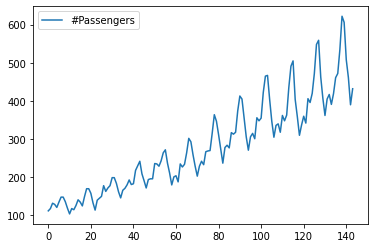

In [ ]:
data.plot()
pyplot.show()

On remarque clairement une tendance et une saisonalité sur cette série. Comme précédemment, on décompose cette série suivant les modèles **additif** et ** multiplicatif**.

In [ ]:
data
# data.set_index("Month")
# data[:,1]

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


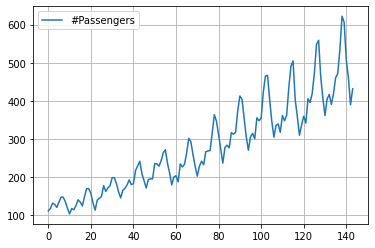

In [ ]:
%matplotlib inline

data.plot(grid = "on")

In [ ]:
from datetime import datetime as dt

data["Month"] = pd.to_datetime(data["Month"])

data.isnull().sum()

data.set_index("Month", inplace = True)

In [ ]:
#### 
#data["Month"].dt.year.head()

#data = data.set_index("Month", inplace = True)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


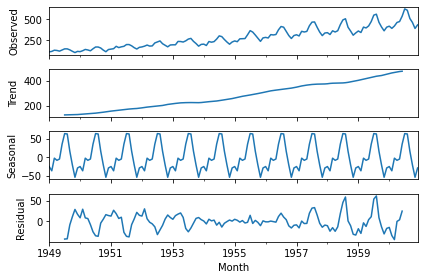

In [ ]:
#### Modèle Additif

import statsmodels.api as sm

#### Décomposition de la série
result = seasonal_decompose(data, model='additive')

#### Affichage des résultats
result.plot()
pyplot.show()

In [ ]:
import statsmodels.api as sm

#### Décomposition de la série
result = seasonal_decompose(ts, model='additive')

#### Affichage des résultats
result.plot()
pyplot.show()

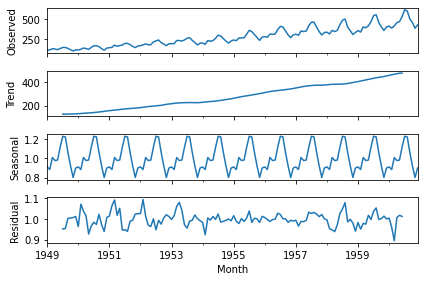

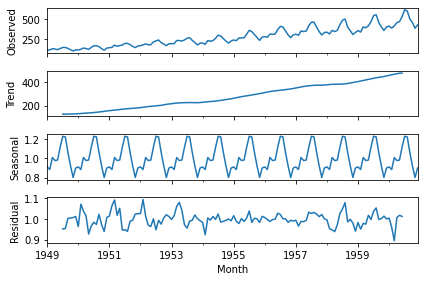

In [ ]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')
result.plot()